# Loan Default Prediction
## Step 3: Exploratory Data Analysis

## Table of Content
1. Recap
2. Imports and Data Loading
3. Relationships between the Target Variable and Predictive Variables
4. Relationships amongst Predictive Variables
5. Summary

## 3.1 Recap
In the previous step, data wrangling, we have checked that there are no missing values, and that the values are all in reasonable ranges. We also found the dataset to be mildly imbalanced in the default column (roughtly 80:20 not default to default); as this is the target feature, analysis would be done with respect to this variable regardless of whether it is balanced. The profiling of the dataset also revealed correlations between other variablea that we will investigate during exploratory data analysis.

## 3.2 Imports and Data Loading

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
path = '/Users/hao/loan_default_prediction_repo/data/raw/'
filename = 'Customer Loan Data.csv'
df = pd.read_csv(path+filename)
df.head()

,customer_id,credit_lines_outstanding,loan_amt_outstanding,total_debt_outstanding,income,years_employed,fico_score,default
0,8153374,0,5221.545193,3915.471226,78039.38546,5,605,0
1,7442532,5,1958.928726,8228.752520,26648.43525,2,572,1
2,2256073,0,3363.009259,2027.830850,65866.71246,4,602,0
3,4885975,0,4766.648001,2501.730397,74356.88347,5,612,0
4,4700614,1,1345.827718,1768.826187,23448.32631,6,631,0


## 3.3 Relationships between the Target Variable and Predictive Variables
We are chiefly interested in default, the target variable. Start by separating the data as default vs non-default.

In [3]:
#since we do not need to analyze the id, drop the index
df = df.drop(['customer_id'],axis=1)

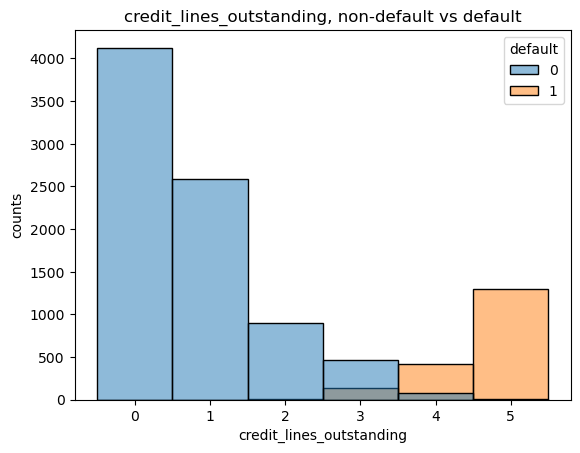

In [4]:
sns.histplot(data=df, x="credit_lines_outstanding", hue="default", discrete=True)
_ = plt.title('credit_lines_outstanding, non-default vs default')
_ = plt.ylabel('counts')
_ = plt.xlabel('credit_lines_outstanding') 

#### credit_lines_outstanding:
potentially of great importance; clear distinction between the non-default(peak at 0) and default (peak at 5) distributions.

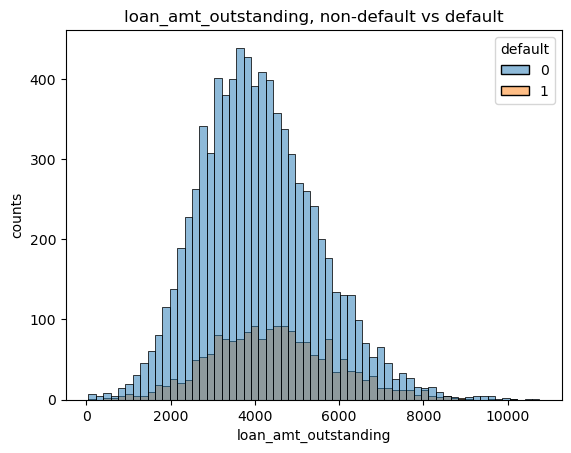

In [5]:
sns.histplot(data=df, x="loan_amt_outstanding", hue="default")
_ = plt.title('loan_amt_outstanding, non-default vs default')
_ = plt.ylabel('counts')
_ = plt.xlabel('loan_amt_outstanding') 

#### loan_amt_outstanding:
both roughly normal and sharing mean.

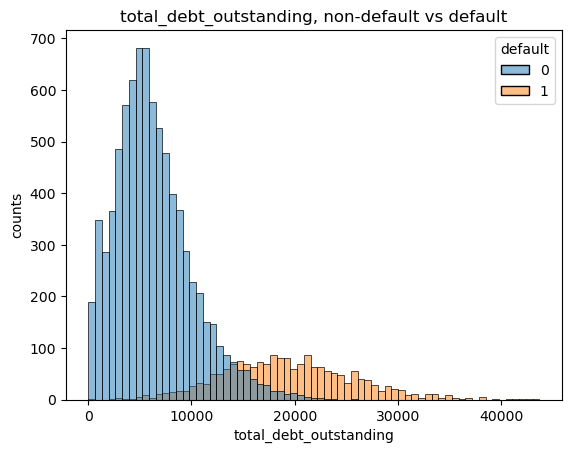

In [6]:
sns.histplot(data=df, x="total_debt_outstanding", hue="default")
_ = plt.title('total_debt_outstanding, non-default vs default')
_ = plt.ylabel('counts')
_ = plt.xlabel('total_debt_outstanding')

#### total_debt_outstanding:
again distinct peaks; at above ~15,000 default becomes more likely than non-default.

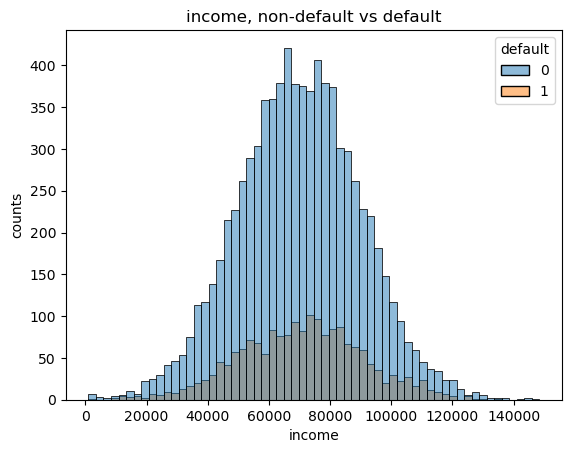

In [7]:
sns.histplot(data=df, x="income", hue="default")
_ = plt.title('income, non-default vs default')
_ = plt.ylabel('counts')
_ = plt.xlabel('income') 

#### income:
both roughly normal and sharing mean.

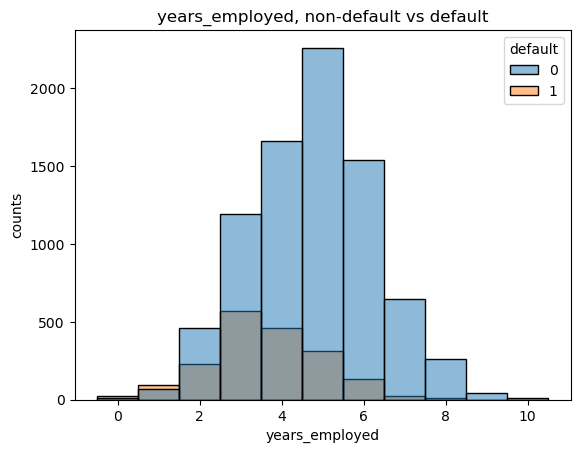

In [8]:
sns.histplot(data=df, x="years_employed", hue="default", discrete=True)
_ = plt.title('years_employed, non-default vs default')
_ = plt.ylabel('counts')
_ = plt.xlabel('years_employed') 

#### years_employed:
perhaps worthy of a two sample t-test, which we will run here.

In [9]:
stats.ttest_ind(df[df['default']==0]['years_employed'], df[df['default']==1]['years_employed'])

TtestResult(statistic=29.674023034675074, pvalue=1.567181722121425e-185, df=9998.0)

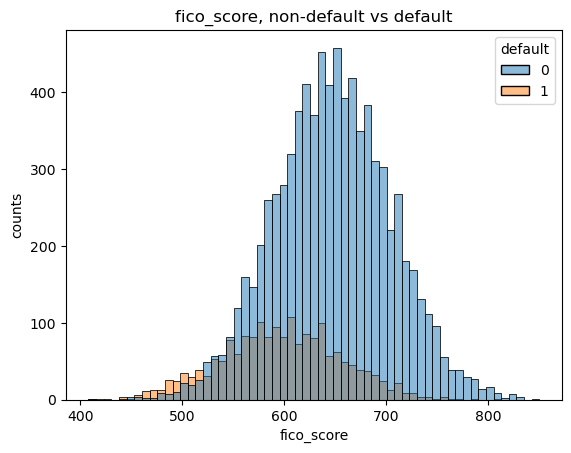

In [10]:
sns.histplot(data=df, x="fico_score", hue="default")
_ = plt.title('fico_score, non-default vs default')
_ = plt.ylabel('counts')
_ = plt.xlabel('fico_score') 

#### fico_score:
similar to years_employed, perhaps worthy of a two sample t-test, which we will run here.

In [11]:
stats.ttest_ind(df[df['default']==0]['fico_score'], df[df['default']==1]['fico_score'])

TtestResult(statistic=34.30486883105719, pvalue=6.322581614894992e-244, df=9998.0)

### Analysis
1. credit_lines_outstanding and total_debt_outstanding seem significant in explaining the probability of default

2. loan_amt_outstanding and income do not seem to be as prominant features in comparison

3. years_employed and fico_score share some similarities in distribution, which might be a result of how fico scores are calculated which is out of scope of this particular project but nonetheless interesting; Two-sample t-test reveals that the difference in population mean of default and non-default might be significant

## 3.4 Relationships amongst Predictive Variables
Recall from data profiling during the last step, we found correlations between these groups of features:
1. credit_lines_outstanding, total_debt_outstanding (and both with default)

2. income, loan_amt_outstanding

These agree with the findings in the above section, which also points out potential relations between

3. years_employed and fico_score

Therefore we will investigate these three pairwise relationships

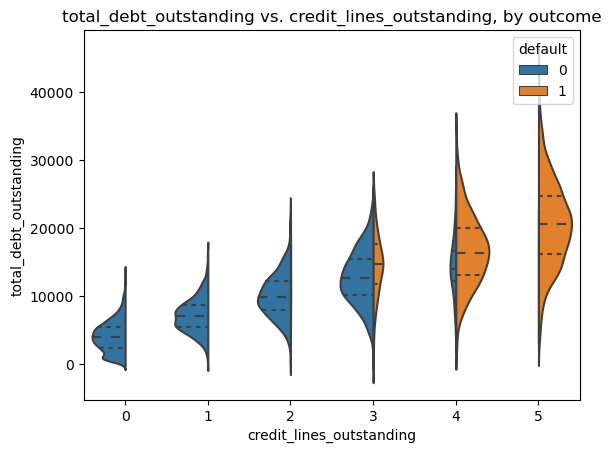

In [12]:
sns.violinplot(data=df, x="credit_lines_outstanding", y="total_debt_outstanding",\
               hue="default", inner='quart', split=True, scale='count')
_ = plt.title('total_debt_outstanding vs. credit_lines_outstanding, by outcome')
_ = plt.ylabel('total_debt_outstanding')
_ = plt.xlabel('credit_lines_outstanding') 

This shows the trend of more credit_lines_outstanding corresponding to higher total_debt_outstanding and these feature may likely be combined during PCA.

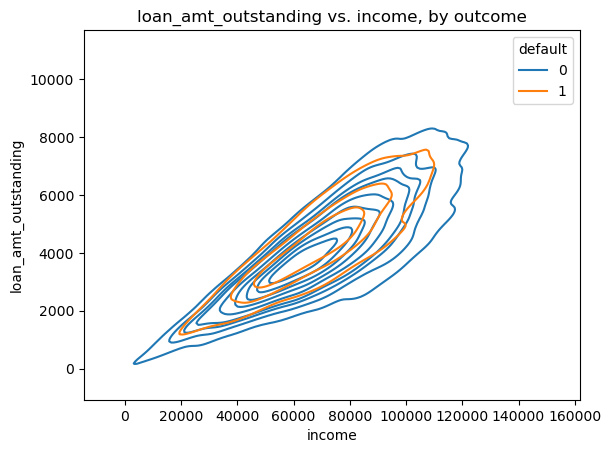

In [13]:
sns.kdeplot(data=df, x="income", y="loan_amt_outstanding", hue="default")
_ = plt.title('loan_amt_outstanding vs. income, by outcome')
_ = plt.ylabel('loan_amt_outstanding')
_ = plt.xlabel('income') 

There is clear correlation between the two, however both are limited in discerning default and non-default cases; they may likely be combined during PCA but given a low weight.

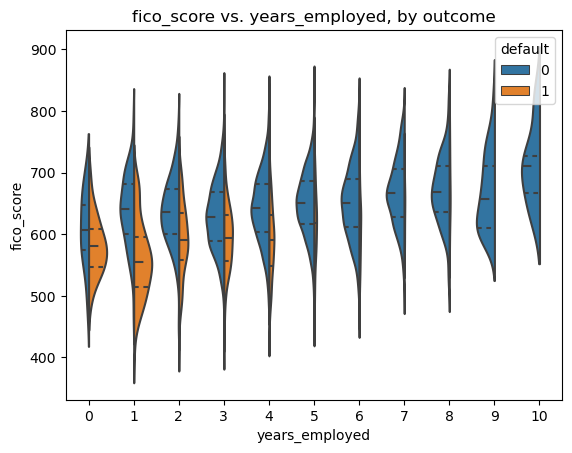

In [14]:
sns.violinplot(data=df, x="years_employed", y="fico_score",\
               hue="default", inner='quart', split=True, scale='count')
_ = plt.title('fico_score vs. years_employed, by outcome')
_ = plt.ylabel('fico_score')
_ = plt.xlabel('years_employed') 

Despite the similarities in their respective histograms, these features do not seem to be strongly correlated. Although it seems both features could be good predictors as per analysis in the last section.

## 3.5 Summary
During this step we have identified some prominant features as well as correlations. In particular, credit_lines_outstanding and total_debt_outstanding to be prominant predictor features. Additionally years_employed and fico_score may also offer some predicting power. The last pair, loan_amt_outstanding and income, may have limited effect on probability of defautlt but highly correlated with each other and may be reduced into a single component in feature engineering.